# **ANÁLISIS DESCRIPTIVO - MÉTODO NUMÉRICO**

In [1]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt

# Cargas datos
data = pd.read_excel("Datos.xlsx")

# Mostrar primeras columnas
data.head()

,Sexo,Edad,Experiencia,Salario
0,Hombre,45,10,4390146
1,Mujer,23,3,1837736
2,Mujer,32,5,3055596
3,Hombre,42,12,1184036
4,Hombre,25,5,3638265


In [2]:
import warnings
# Suprimir el warning específico
warnings.simplefilter(action='ignore', category=FutureWarning)
# Seleccionar variables numéricas
numeric_data = data.select_dtypes(include=['number'])
# Calcular los estadigrafos básicos
desc_stats_auto = numeric_data.describe()
# Agregar moda a los estadisticos
modes_auto = numeric_data.mode().loc[0]
desc_stats_auto = desc_stats_auto.append(pd.Series(modes_auto, name='Moda'))
# Definir cifras significativas
desc_stats_rounded = desc_stats_auto.round(2)
desc_stats_rounded

,Edad,Experiencia,Salario
count,25.00,25.00,25.00
mean,28.52,6.44,2906802.16
std,8.73,4.76,1238558.29
min,17.00,1.00,1184036.00
25%,23.00,3.00,1559609.00
50%,27.00,5.00,3055596.00
75%,33.00,10.00,4112614.00
max,52.00,20.00,4469627.00
Moda,23.00,5.00,1184036.00


In [3]:
# Calcular frecuencia absoluta
freq_abs_sex = data["Sexo"].value_counts()
# Calcular frecuencia relativa
freq_rel_sex = data["Sexo"].value_counts(normalize=True)
# Crear tabla de frecuencia
tabla_freq_sex = pd.DataFrame({"Frecuencia absoluta": freq_abs_sex, "Frecuencia relativa": freq_rel_sex})
print(tabla_freq_sex)

        Frecuencia absoluta  Frecuencia relativa
Mujer                    16                 0.64
Hombre                    9                 0.36


In [4]:
# Definir categorías de edad
data["Categoría Edad"] = ["Mayor de 22 años" if edad > 22 else "Menor o igual a 22 años" for edad in data["Edad"]]
# Calcular frecuencia absoluta
freq_abs_age = data["Categoría Edad"].value_counts()
# Calcular frecuencia relativa
freq_rel_age = data["Categoría Edad"].value_counts(normalize=True)
# Crear tabla de frecuencia
tabla_freq_age = pd.DataFrame({"Frecuencia absoluta": freq_abs_age, "Frecuencia relativa": freq_rel_age})
print(tabla_freq_age)

                         Frecuencia absoluta  Frecuencia relativa
Mayor de 22 años                          19                 0.76
Menor o igual a 22 años                    6                 0.24


In [5]:
# Definir categorías de salario
data["Categoría Salario"] = ["Salario mayor a 2,000,000" if salario > 2000000 else "Salario menor o igual a 2,000,000" for salario in data["Salario"]]
# Calcular frecuencia absoluta
freq_abs_salary = data["Categoría Salario"].value_counts()
# Calcular frecuencia relativa
freq_rel_salary = data["Categoría Salario"].value_counts(normalize=True)
# Crear tabla de frecuencia
tabla_freq_salary = pd.DataFrame({"Frecuencia absoluta": freq_abs_salary, "Frecuencia relativa": freq_rel_salary})
print(tabla_freq_salary)

                                   Frecuencia absoluta  Frecuencia relativa
Salario mayor a 2,000,000                           15                  0.6
Salario menor o igual a 2,000,000                   10                  0.4


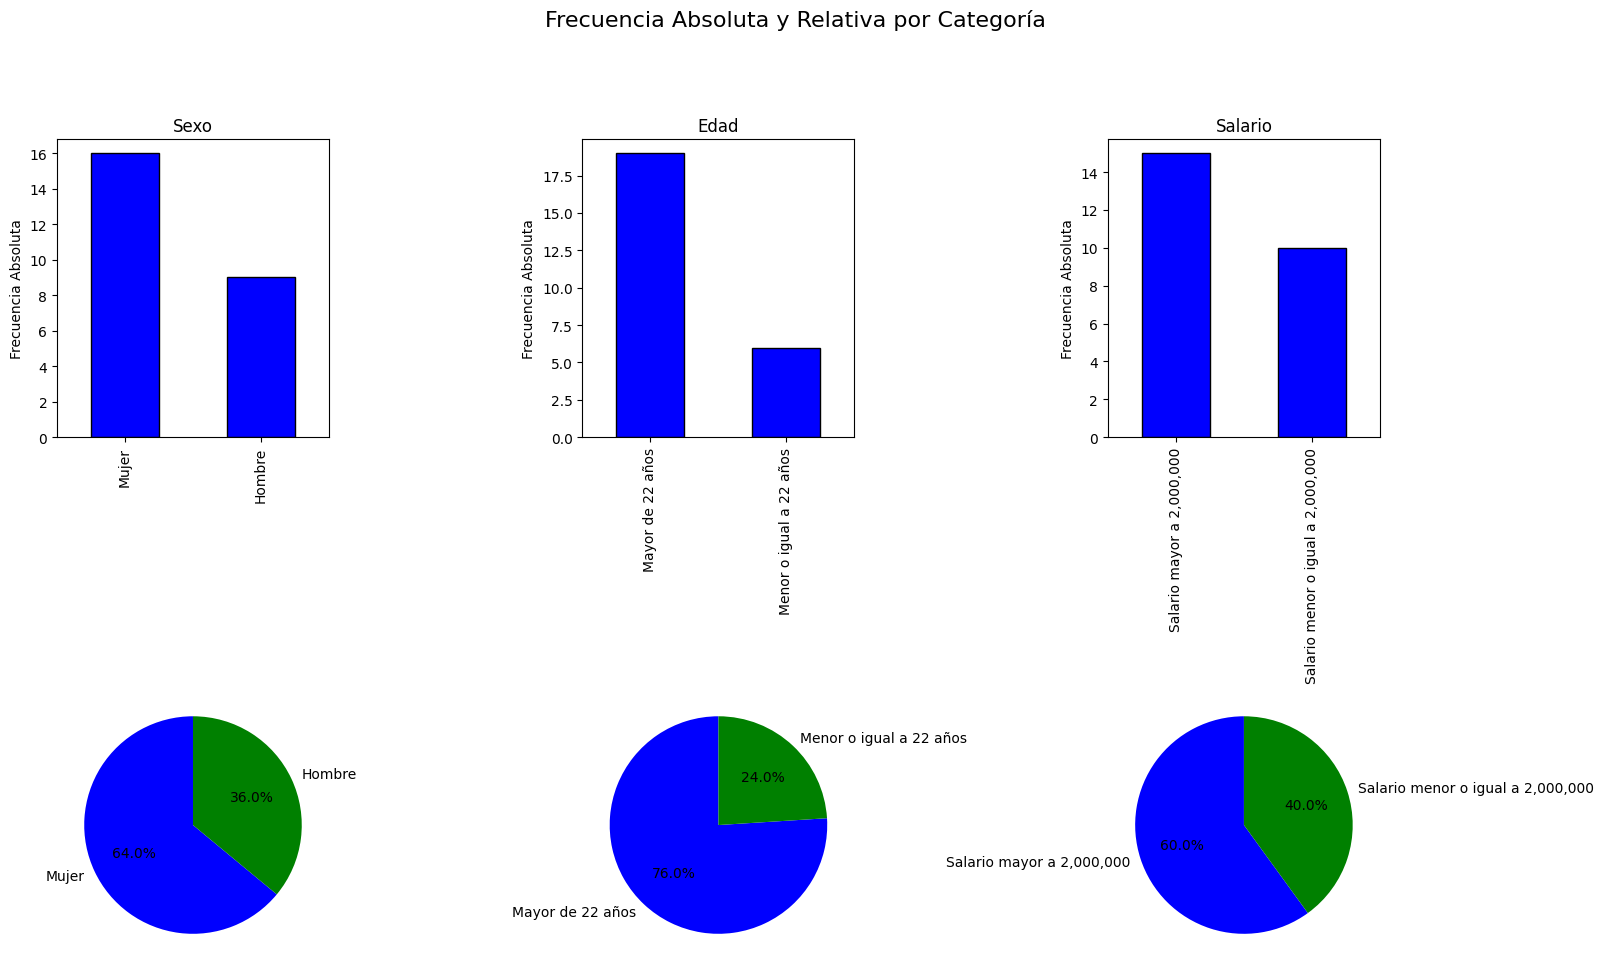

In [6]:
# Configuración de la figura y los ejes
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.suptitle('Frecuencia Absoluta y Relativa por Categoría', fontsize=16)
# Colors de los gráficos
bar_color = 'blue'
pie_colors = ['blue', 'green']
# Gráfico para 'Sexo'
freq_abs_sex.plot(kind='bar', ax=ax[0, 0], color=bar_color, edgecolor='black')
freq_rel_sex.plot(kind='pie', ax=ax[1, 0], autopct='%1.1f%%', startangle=90, colors=pie_colors)
ax[0, 0].set_title('Sexo')
ax[0, 0].set_ylabel('Frecuencia Absoluta')
ax[1, 0].set_ylabel('')
# Gráfico para 'Categoría Edad'
freq_abs_age.plot(kind='bar', ax=ax[0, 1], color=bar_color, edgecolor='black')
freq_rel_age.plot(kind='pie', ax=ax[1, 1], autopct='%1.1f%%', startangle=90, colors=pie_colors)
ax[0, 1].set_title('Edad')
ax[0, 1].set_ylabel('Frecuencia Absoluta')
ax[1, 1].set_ylabel('')
# Gráfico para 'Categoría Salario'
freq_abs_salary.plot(kind='bar', ax=ax[0, 2], color=bar_color, edgecolor='black')
freq_rel_salary.plot(kind='pie', ax=ax[1, 2], autopct='%1.1f%%', startangle=90, colors=pie_colors)
ax[0, 2].set_title('Salario')
ax[0, 2].set_ylabel('Frecuencia Absoluta')
ax[1, 2].set_ylabel('')
# Ajuste de diseño
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# **CREAR UN REPORTE EXCEL**

In [7]:
# Crear un Excel con los resultados
with pd.ExcelWriter('Resultados-Analisis.xlsx') as writer:
    # Exportar cada DataFrame a una hoja diferente
    desc_stats_rounded.to_excel(writer, sheet_name='Estadisticos Basicos')
    tabla_freq_sex.to_excel(writer, sheet_name='Frecuencia Sexo')
    tabla_freq_age.to_excel(writer, sheet_name='Frecuencia Edad')
    tabla_freq_salary.to_excel(writer, sheet_name='Frecuencia Salario')

# **CREAR UN REPORTE HTML**

In [8]:
import io
import base64
# Guardar el gráfico como una imagen en memoria
img_data = io.BytesIO()
plt.savefig(img_data, format='png')
plt.close()
img_data.seek(0)
img_base64 = base64.b64encode(img_data.getvalue()).decode('utf-8')

# Crear el reporte en HTML
html_report = f"""
<html>
    <head>
        <title>Reporte de Estadisticas</title>
    </head>
    <body>
        <h1>Reporte de Estadisticas</h1>
        <h2>Estadísticos Basicos</h2>
        {desc_stats_rounded.to_html()}
        <h2>Tabla de Frecuencia - Sexo</h2>
        {tabla_freq_sex.to_html()}
        <h2>Tabla de Frecuencia - Edad</h2>
        {tabla_freq_age.to_html()}
        <h2>Tabla de Frecuencia - Salario</h2>
        {tabla_freq_salary.to_html()}
        <h2>Gráficos de Frecuencia</h2>
        <img src="data:image/png;base64,{img_base64}" alt="Gráficos de Frecuencia">
    </body>
</html>
"""

# Guardar el reporte en un archivo HTML
with open("reporte.html", "w", encoding="utf-8") as file:
    file.write(html_report)

print("Reporte.html")

Reporte.html
